# Time-stepping based on Runge-Kutta approach (direct solve)



L_inf error : 0.11924727054171666


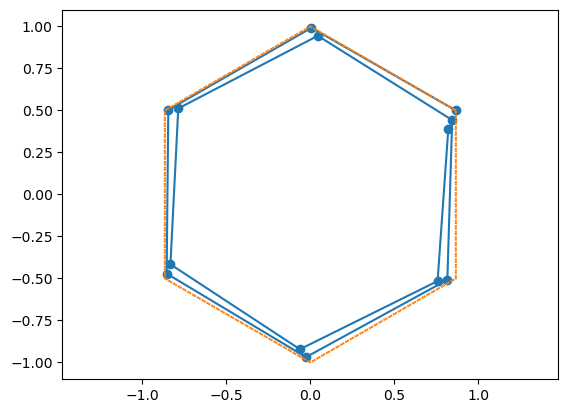

In [1]:
import numpy as np
from qmat import Q_GENERATORS

coll = Q_GENERATORS["RK4"]()
nodes, weights, Q = coll.genCoeffs()

lam = 1j
T = 4*np.pi
nSteps = 12
u0 = np.exp(1j*np.pi/6)

uNum = np.zeros(nSteps+1, dtype=complex)
uNum[0] = u0

dt = T/nSteps
A = np.eye(nodes.size) - lam*dt*Q
for i in range(nSteps):
    b = np.ones(nodes.size)*uNum[i]
    uStages = np.linalg.solve(A, b)
    uNum[i+1] = uNum[i] + lam*dt*weights.dot(uStages)


import matplotlib.pyplot as plt
plt.plot(uNum.real, uNum.imag, 'o-')
plt.axis("equal")

times = np.linspace(0, T, nSteps+1)
uExact = u0 * np.exp(lam*times)
plt.plot(uExact.real, uExact.imag, ':')
print("L_inf error :", np.linalg.norm(uNum-uExact, ord=np.inf))


L_inf error : 1.1862149434225921e-05


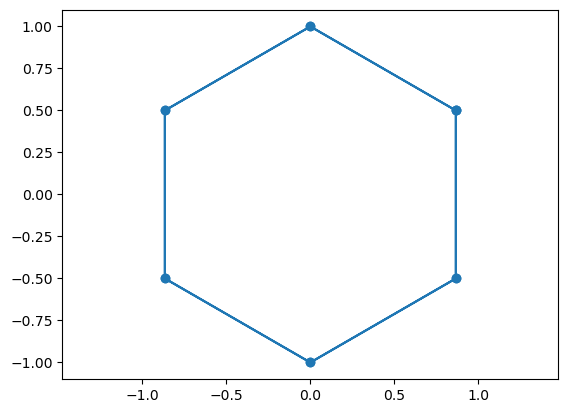

In [2]:
coll = Q_GENERATORS["coll"](nNodes=4, nodeType="LEGENDRE", quadType="RADAU-RIGHT")
uNum = coll.solveDahlquist(lam, u0, T, nSteps)
plt.plot(uNum.real, uNum.imag, 'o-')
plt.axis("equal")
print("L_inf error :", coll.errorDahlquist(lam, u0, T, nSteps, uNum=uNum))